<a href="https://colab.research.google.com/github/itsEkramah/rna-seq-pipeline/blob/main/AMR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages(c("dplyr", "ggplot2", "AMR"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(dplyr)
library(ggplot2)
library(AMR)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# View the unclean example data
example_isolates_unclean

# View the cleaner example data
example_isolates

patient_id,hospital,date,bacteria,AMX,AMC,CIP,GEN
<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>
J3,A,2012-11-21,E. coli,R,I,S,S
R7,A,2018-04-03,K. pneumoniae,R,I,S,S
P3,A,2014-09-19,E. coli,R,S,S,S
P10,A,2015-12-10,E. coli,S,I,S,S
B7,A,2015-03-02,E. coli,S,S,S,S
W3,A,2018-03-31,S. aureus,R,S,R,S
J8,A,2016-06-14,E. coli,R,S,S,S
M3,A,2015-10-25,E. coli,R,S,S,S
J3,A,2019-06-19,E. coli,S,S,S,S


date,patient,age,gender,ward,mo,PEN,OXA,FLC,AMX,⋯,ERY,CLI,AZM,IPM,MEM,MTR,CHL,COL,MUP,RIF
<date>,<chr>,<dbl>,<chr>,<chr>,<mo>,<sir>,<sir>,<sir>,<sir>,⋯,<sir>,<sir>,<sir>,<sir>,<sir>,<sir>,<sir>,<sir>,<sir>,<sir>
2002-01-02,A77334,65,F,Clinical,B_ESCHR_COLI,R,NA,NA,NA,⋯,R,R,R,NA,NA,NA,NA,NA,NA,R
2002-01-03,A77334,65,F,Clinical,B_ESCHR_COLI,R,NA,NA,NA,⋯,R,R,R,NA,NA,NA,NA,NA,NA,R
2002-01-07,067927,45,F,ICU,B_STPHY_EPDR,R,NA,R,NA,⋯,R,NA,R,NA,NA,NA,NA,R,NA,NA
2002-01-07,067927,45,F,ICU,B_STPHY_EPDR,R,NA,R,NA,⋯,R,NA,R,NA,NA,NA,NA,R,NA,NA
2002-01-13,067927,45,F,ICU,B_STPHY_EPDR,R,NA,R,NA,⋯,R,NA,R,NA,NA,NA,NA,R,NA,NA
2002-01-13,067927,45,F,ICU,B_STPHY_EPDR,R,NA,R,NA,⋯,R,R,R,NA,NA,NA,NA,R,NA,NA
2002-01-14,462729,78,M,Clinical,B_STPHY_AURS,R,NA,S,R,⋯,S,NA,S,NA,NA,NA,NA,R,NA,NA
2002-01-14,462729,78,M,Clinical,B_STPHY_AURS,R,NA,S,R,⋯,S,NA,S,NA,NA,NA,NA,R,NA,NA
2002-01-16,067927,45,F,ICU,B_STPHY_EPDR,R,NA,R,NA,⋯,R,NA,R,NA,NA,NA,NA,R,NA,NA


In [4]:
our_data <- example_isolates_unclean

In [5]:
library(AMR)
# Examples of as.mo() usage
as.mo("Klebsiella pneumoniae")
as.mo("K. pneumoniae")
as.mo("KLEPNE")
as.mo("KLPN")

# To clean the 'bacteria' column in your dataset:
our_data <- example_isolates_unclean # Start with the unclean data
our_data$bacteria <- as.mo(our_data$bacteria, info = TRUE)

Class 'mo'
[1] B_KLBSL_PNMN

Class 'mo'
[1] B_KLBSL_PNMN

Class 'mo'
[1] B_KLBSL_PNMN

Class 'mo'
[1] B_KLBSL_PNMN

ℹ Retrieved values from the microorganisms.codes data set for "ESCCOL",
  "KLEPNE", "STAAUR", and "STRPNE".

ℹ Returning previously coerced values for "K. pneumoniae". Run
  mo_reset_session() to reset this. This note will be shown once per
  session for this input.

ℹ Microorganism translation was uncertain for "E. coli" (assumed
  Escherichia coli), "S. aureus" (assumed Staphylococcus aureus), and "S.
  pneumoniae" (assumed Streptococcus pneumoniae). Run mo_uncertainties() to
  review these uncertainties, or use add_custom_microorganisms() to add
  custom entries.



In [6]:
mo_uncertainties()

original_input,input,fullname,mo,candidates,minimum_matching_score,keep_synonyms
<chr>,<chr>,<chr>,<mo>,<chr>,<chr>,<lgl>
E. coli,E coli,Escherichia coli,B_ESCHR_COLI,"Enterococcus crotali, Escherichia coli coli, Escherichia coli expressing, Enterobacter cowanii, Enterococcus columbae, Enterococcus camelliae, Enterococcus casseliflavus, Enterobacter cloacae cloacae, Enterobacter cloacae complex, Enterobacter cloacae dissolvens, Enterococcus canis, Enterobacter cloacae, Enterococcus cecorum, Enterobacter cancerogena, Enterobacter cancerogenus, Enterobacter chengduensis, Enterobacter chuandaensis, Enterococcus canintestini, Eubacterium combesii, Eggerthia catenaformis, Eubacterium callanderi, Enterocloster citroniae, Eubacterium cylindroides, Enterococcus caccae, Ehrlichia canis, Ezakiella coagulans, Eikenella corrodens, Erwinia cancerogena, Ehrlichia chaffeensis, Eubacterium contortum, Effusibacillus consociatus, Exidia cokeri, Erwinia coffeiphila, Eubacterium coprostanoligenes, Exidia corrugativa, Exidia cartaliginea, Exidia cartilaginea, Eubacterium cellulosolvens, Exophiala campbellii, Exophiala crusticola, Erwinia carotovora wasabiae, Entamoeba coli, Erwinia carotovora odorifera, Exophiala calicioides, Exophiala calycioides, Exophiala castellanii, Enterocloster clostridioformis, Erwinia carotovora atroseptica, Erysipelatoclostridium cocleatum, Erwinia carotovora betavasculorum, Epidermophyton floccosum clypeiforme, Exserohilum corniculatum, Erwinia cacticida, Erwinia carotovora, Erwinia cypripedii, Exidia cerasi, Exidia cornea, Erwinia carnegieana, Exophiala clavispora, Exidia candida cartilaginea, Erwinia chrysanthemi, Exidia candida, Exidia carnosa, Epilithonimonas caeni, Exidia cartilaginea abromeitii, Exidia catillus, Exidia compacta, Exophiala jeanselmei castellanii, Exiguobacterium chiriqhucha, Exidia caespitosa, Exidia cystidiata, Epidermophyton clypeiforme, Erwinia carotovora carotovora, Exophiala capensis, Epidermophyton cruris, Exidia cinnamomescens, Exophiala candelabrata, Exophiala caementiphila, Exserohilum curvisporum, Exidia saccharina carnea, Exserohilum crassiseptata, Exophiala cinerea, Exserohilum crassiseptata lactucae, Enterovibrio coralii, Erythrobacter colymbi, Exidia crenata, Exophiala cancerae, Exserohilum curvatum, Endozoicomonas coralli, Evansella cellulosilytica, Evansella cellulosilyticus, Entomospira culicis, Eremococcus coleocola, Endobacterium cerealis, Evansella clarkii, Edaphocola chishuiensis, Enterovibrio calviensis, Eperythrozoon coccoides",NULL,FALSE
S. aureus,S aureus,Staphylococcus aureus,B_STPHY_AURS,"Staphylococcus aureus aureus, Staphylococcus argenteus, Staphylococcus aureus anaerobius, Staphylococcus auricularis, Salmonella Aurelianis, Salmonella Aarhus, Salmonella Amounderness, Staphylococcus argensis, Streptococcus australis, Salmonella choleraesuis arizonae, Streptococcus anginosus anginosus, Serratia aquatilis, Salmonella Abaetetuba, Salmonella Argenteuil, Salmonella Abortusequi, Salmonella Abortusovis, Salmonella Albuquerque, Staphylococcus agnetis, Streptococcus adjacens, Staphylococcus arlettae, Streptococcus anginosus, Streptococcus acidominimus, Streptococcus alactolyticus, Staphylococcus americanisciuri, Streptococcus anginosus whileyi, Salmonella Arusha, Salmonella Austin, Salmonella Australia, Salmonella Augustenborg, Salmonella Alexanderpolder, Salmonella Aachen, Salmonella Aba, Salmonella Abadina, Salmonella Aberdeen, Salmonella Abidjan, Salmonella Ablogame, Salmonella Abobo, Salmonella Abony, Salmonella Abuja, Salmonella Accra, Salmonella Ackwepe, Salmonella Adabraka, Salmonella Adamstown, Salmonella Adamstua, Salmonella Adana, Salmonella Adelaide, Salmonella Adeoyo, Salmonella Aderike, Salmonella Adime, Salmonella Adjame, Salmonella Aequatoria, Salmonella Aesch, Salmonella Aflao, Salmonella Africana, Salmonella Afula, Salmonella Agama, Salmonella Agbara, Salmonella Agbeni, Salmonella Agege, Salmonella Ago, Salmonella Agodi, Salmonella Agona, Salmonella Agoueve, Sal

In [7]:
mo_family("K. pneumoniae")
mo_gramstain("Escherichia coli")

[1] "Enterobacteriaceae"

[1] "Gram-negative"

In [8]:
# Assuming 'our_data' already has the 'bacteria' column cleaned with as.mo()
# Method 1: Be explicit about the columns (e.g., from AMX to GEN)
our_data <- our_data %>%
  mutate_at(vars(AMX:GEN), as.sir)

# Method 2: Let the AMR package determine eligible columns
# (This is often safer as it avoids accidentally transforming non-antibiotic columns)
our_data <- our_data %>%
  mutate_if(is_sir_eligible, as.sir)

In [9]:
# Assuming 'our_data' is already cleaned for mo and sir
our_data <- our_data %>%
  mutate(first = first_isolate(info = TRUE))
# The 'info = TRUE' argument provides informative messages on the method used and isolates found.

# Then, filter your data to include only these first isolates:
our_data_1st <- our_data %>%
  filter(first == TRUE)

# For convenience, this can be shortened using filter_first_isolate():
our_data_1st <- our_data %>%
  filter_first_isolate()

ℹ Determining first isolates using an episode length of 365 days

ℹ Using column 'bacteria' as input for col_mo.

ℹ Using column 'date' as input for col_date.

ℹ Using column 'patient_id' as input for col_patient_id.

ℹ Basing inclusion on all antimicrobial results, using a points threshold
  of 2

=> Found 2,724 'phenotype-based' first isolates (90.8% of total where a
   microbial ID was available)



In [10]:
summary(our_data_1st)

  patient_id          hospital              date           
 Length:2724        Length:2724        Min.   :2011-01-01  
 Class :character   Class :character   1st Qu.:2013-04-07  
 Mode  :character   Mode  :character   Median :2015-06-03  
                                       Mean   :2015-06-09  
                                       3rd Qu.:2017-08-11  
                                       Max.   :2019-12-27  
   bacteria               AMX                    AMC                
 Class :mo             Class:sir              Class:sir             
 <NA>  :0              %S   :41.6% (n=1133)   %S   :52.6% (n=1432)  
 Unique:4              %SDD : 0.0% (n=0)      %SDD : 0.0% (n=0)     
 #1    :B_ESCHR_COLI   %I   :16.4% (n=446)    %I   :12.2% (n=333)   
 #2    :B_STPHY_AURS   %R   :42.0% (n=1145)   %R   :35.2% (n=959)   
 #3    :B_STRPT_PNMN   %NI  : 0.0% (n=0)      %NI  : 0.0% (n=0)     
    CIP                    GEN                  first        
 Class:sir              Class:sir  

In [11]:
glimpse(our_data_1st)

Rows: 2,724
Columns: 9
$ patient_id <chr> "J3", "R7", "P3", "P10", "B7", "W3", "M3", "J3", "G6", "P4"…
$ hospital   <chr> "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A",…
$ date       <date> 2012-11-21, 2018-04-03, 2014-09-19, 2015-12-10, 2015-03-02…
$ bacteria   <mo> "B_ESCHR_COLI", "B_KLBSL_PNMN", "B_ESCHR_COLI", "B_ESCHR_COL…
$ AMX        <sir> R, R, R, S, S, R, R, S, S, S, S, R, S, S, R, R, R, R, S, R,…
$ AMC        <sir> I, I, S, I, S, S, S, S, S, S, S, S, S, S, S, S, S, R, S, S,…
$ CIP        <sir> S, S, S, S, S, R, S, S, S, S, S, S, S, S, S, S, S, S, S, S,…
$ GEN        <sir> S, S, S, S, S, S, S, S, S, S, S, R, S, S, S, S, S, S, S, S,…
$ first      <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE,…


In [12]:
sapply(our_data_1st, n_distinct)

patient_id   hospital       date   bacteria        AMX        AMC        CIP 
       260          3       1854          4          3          3          3 
       GEN      first 
         3          1

In [13]:
# Assuming 'our_data_1st' is your cleaned data with first isolates
library(AMR)
library(dplyr)

# Count resistant isolates for Amoxicillin (AMX)
count_R(our_data_1st$AMX)

# Count susceptible (S+I) isolates for Ciprofloxacin (CIP)
count_susceptible(our_data_1st$CIP)

# Count all tested isolates for Gentamicin (GEN)
count_all(our_data_1st$GEN)

# Example with grouping by hospital and summarizing counts for multiple antibiotics
our_data_1st %>%
  group_by(hospital) %>%
  summarise(
    AMX_R_count = count_R(AMX),
    AMX_SI_count = count_susceptible(AMX),
    AMX_Total_Tested = count_all(AMX),
    CIP_R_count = count_R(CIP),
    CIP_SI_count = count_susceptible(CIP),
    CIP_Total_Tested = count_all(CIP)
  )

[1] 1145

[1] 1607

[1] 2724

hospital,AMX_R_count,AMX_SI_count,AMX_Total_Tested,CIP_R_count,CIP_SI_count,CIP_Total_Tested
<chr>,<int>,<int>,<int>,<int>,<int>,<int>
A,308,597,905,194,711,905
B,499,406,905,729,176,905
C,338,576,914,194,720,914


In [14]:
# Assuming 'our_data_1st' is your cleaned data with first isolates
library(AMR)
library(dplyr)

# Calculate resistance percentage for Amoxicillin (AMX)
our_data_1st %>% resistance(AMX, as_percent = TRUE)

# Calculate susceptibility percentage for Ciprofloxacin (CIP)
our_data_1st %>% susceptibility(CIP, as_percent = TRUE)

# Example with grouping by hospital and summarizing resistance for multiple antibiotics
our_data_1st %>%
  group_by(hospital) %>%
  summarise(
    AMX_Resistance = resistance(AMX, as_percent = TRUE),
    AMC_Resistance = resistance(AMC, as_percent = TRUE),
    CIP_Resistance = resistance(CIP, as_percent = TRUE)
  )

# Calculating co-resistance (e.g., resistance to both AMX and CIP)
our_data_1st %>% resistance(AMX, CIP, as_percent = TRUE, only_all_tested = TRUE)

[1] "42.0%"

[1] "59.0%"

hospital,AMX_Resistance,AMC_Resistance,CIP_Resistance
<chr>,<chr>,<chr>,<chr>
A,34.0%,15.6%,21.4%
B,55.1%,76.0%,80.6%
C,37.0%,14.2%,21.2%


[1] "19.8%"

In [15]:
# Assuming 'our_data_1st' is your cleaned data with first isolates
library(AMR)
library(dplyr)

# Calculate resistance percentage for Amoxicillin (AMX)
our_data_1st %>% resistance(AMX, as_percent = TRUE)

# Calculate susceptibility percentage for Ciprofloxacin (CIP)
our_data_1st %>% susceptibility(CIP, as_percent = TRUE)

# Example with grouping by hospital and summarizing resistance for multiple antibiotics
our_data_1st %>%
  group_by(hospital) %>%
  summarise(
    AMX_Resistance = resistance(AMX, as_percent = TRUE),
    AMC_Resistance = resistance(AMC, as_percent = TRUE),
    CIP_Resistance = resistance(CIP, as_percent = TRUE)
  )

# Calculating co-resistance (e.g., resistance to both AMX and CIP)
our_data_1st %>% resistance(AMX, CIP, as_percent = TRUE, only_all_tested = TRUE)

[1] "42.0%"

[1] "59.0%"

hospital,AMX_Resistance,AMC_Resistance,CIP_Resistance
<chr>,<chr>,<chr>,<chr>
A,34.0%,15.6%,21.4%
B,55.1%,76.0%,80.6%
C,37.0%,14.2%,21.2%


[1] "19.8%"

In [16]:
# Assuming 'example_isolates' is your cleaned dataset
library(AMR)
library(dplyr)

# Apply mdro() with the default guideline (CMI 2012)
out_cmi2012 <- mdro(example_isolates)
str(out_cmi2012) # View structure of the output
table(out_cmi2012) # Get counts for each MDRO category

# Apply mdro() with a specific guideline (e.g., EUCAST 3.3)
out_eucast <- mdro(example_isolates, guideline = "EUCAST 3.3")
table(out_eucast)

# Using mdro() within a dplyr pipeline to add MDRO status as a new column
example_isolates %>%
  mutate(MDRO_status = mdro()) %>%
  count(MDRO_status)

# Using verbose mode to get detailed reasons for classification
detailed_mdro_results <- mdro(example_isolates, verbose = TRUE)
head(detailed_mdro_results)

Warning message:
“in mdro(): NA introduced for isolates where the available percentage of
antimicrobial classes was below 50% (set with pct_required_classes)”


 Ord.factor w/ 4 levels "Negative"<"Multi-drug-resistant (MDR)"<..: NA NA 1 1 1 1 NA NA 1 1 ...


out_cmi2012
                        Negative       Multi-drug-resistant (MDR) 
                            1617                              128 
Extensively drug-resistant (XDR)          Pandrug-resistant (PDR) 
                               0                                0 

out_eucast
             Negative Positive, unconfirmed              Positive 
                 1994                     0                     6 

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `MDRO_status = mdro()`.
Caused by warning:
! in mdro(): NA introduced for isolates where the available percentage of
antimicrobial classes was below 50% (set with pct_required_classes)”


MDRO_status,n
<ord>,<int>
Negative,1617
Multi-drug-resistant (MDR),128
NA,255


Warning message:
“in mdro(): NA introduced for isolates where the available percentage of
antimicrobial classes was below 50% (set with pct_required_classes)”


,row_number,microorganism,MDRO,reason,all_nonsusceptible_columns,guideline
,<int>,<chr>,<ord>,<chr>,<chr>,<chr>
1,1,Escherichia coli,NA,not enough classes available: 4 of required 9 (~50% of 18),"SXT, TCY","Magiorakos AP, Srinivasan A, Carey RB, ..., Vatopoulos A, Weber JT, Monnet DL - Multidrug-resistant, extensively drug-resistant and pandrug-resistant bacteria: an international expert proposal for interim standard definitions for acquired resistance., NA)"
2,2,Escherichia coli,NA,not enough classes available: 4 of required 9 (~50% of 18),"SXT, TCY","Magiorakos AP, Srinivasan A, Carey RB, ..., Vatopoulos A, Weber JT, Monnet DL - Multidrug-resistant, extensively drug-resistant and pandrug-resistant bacteria: an international expert proposal for interim standard definitions for acquired resistance., NA)"
3,3,Staphylococcus epidermidis,Negative,not covered by guideline,,"Magiorakos AP, Srinivasan A, Carey RB, ..., Vatopoulos A, Weber JT, Monnet DL - Multidrug-resistant, extensively drug-resistant and pandrug-resistant bacteria: an international expert proposal for interim standard definitions for acquired resistance., NA)"
4,4,Staphylococcus epidermidis,Negative,not covered by guideline,,"Magiorakos AP, Srinivasan A, Carey RB, ..., Vatopoulos A, Weber JT, Monnet DL - Multidrug-resistant, extensively drug-resistant and pandrug-resistant bacteria: an international expert proposal for interim standard definitions for acquired resistance., NA)"
5,5,Staphylococcus epidermidis,Negative,not covered by guideline,,"Magiorakos AP, Srinivasan A, Carey RB, ..., Vatopoulos A, Weber JT, Monnet DL - Multidrug-resistant, extensively drug-resistant and pandrug-resistant bacteria: an international expert proposal for interim standard definitions for acquired resistance., NA)"
6,6,Staphylococcus epidermidis,Negative,not covered by guideline,,"Magiorakos AP, Srinivasan A, Carey RB, ..., Vatopoulos A, Weber JT, Monnet DL - Multidrug-resistant, extensively drug-resistant and pandrug-resistant bacteria: an international expert proposal for interim standard definitions for acquired resistance., NA)"


In [17]:
# Example data frame (illustrative)
a <- data.frame(
  mo = c(
    "Staphylococcus aureus",
    "Enterococcus faecalis",
    "Escherichia coli",
    "Klebsiella pneumoniae",
    "Pseudomonas aeruginosa"
  ),
  VAN = "-", # Vancomycin
  AMX = "-", # Amoxicillin
  COL = "-", # Colistin
  CAZ = "-", # Ceftazidime
  CXM = "-", # Cefuroxime
  PEN = "S", # Benzylpenicillin
  FOX = "S", # Cefoxitin
  stringsAsFactors = FALSE
)

# Apply EUCAST rules, overwriting existing SIR values (use with caution)
b <- eucast_rules(a, overwrite = TRUE)
print(b)

# Get a data.frame with transformation details (verbose mode for debugging)
c <- eucast_rules(a, overwrite = TRUE, verbose = TRUE)
head(c)

Warning message:
“in eucast_rules(): not all columns with antimicrobial results are of
class 'sir'. Transform them on beforehand, with e.g.:
  - a %>% as.sir(CXM:PEN)
  - a %>% mutate_if(is_sir_eligible, as.sir)
  - a %>% mutate(across(where(is_sir_eligible), as.sir))”


                      mo VAN AMX COL CAZ CXM PEN FOX
1  Staphylococcus aureus   -   S   R   R   S   S   S
2  Enterococcus faecalis   -   -   R   R   R   S   R
3       Escherichia coli   R   -   -   -   -   R   S
4  Klebsiella pneumoniae   R   R   -   -   -   R   S
5 Pseudomonas aeruginosa   R   R   -   -   R   R   R


Warning message:
“in eucast_rules(): not all columns with antimicrobial results are of
class 'sir'. Transform them on beforehand, with e.g.:
  - a %>% as.sir(CXM:PEN)
  - a %>% mutate_if(is_sir_eligible, as.sir)
  - a %>% mutate(across(where(is_sir_eligible), as.sir))”


,row,col,mo_fullname,old,new,rule,rule_group,rule_name,rule_source
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,AMX,Staphylococcus aureus,-,S,,Breakpoints,Staphylococcus,"'EUCAST Clinical Breakpoint Tables' v15.0, 2025"
2,1,CXM,Staphylococcus aureus,-,S,,Breakpoints,Staphylococcus,"'EUCAST Clinical Breakpoint Tables' v15.0, 2025"
3,1,CAZ,Staphylococcus aureus,-,R,,Expected phenotypes,Table 4: Expected resistant phenotype in gram-positive bacteria,"'EUCAST Expected Resistant Phenotypes' v1.2, 2023"
4,1,COL,Staphylococcus aureus,-,R,,Expected phenotypes,Table 4: Expected resistant phenotype in gram-positive bacteria,"'EUCAST Expected Resistant Phenotypes' v1.2, 2023"
5,2,CAZ,Enterococcus faecalis,-,R,,Expected phenotypes,Table 4: Expected resistant phenotype in gram-positive bacteria,"'EUCAST Expected Resistant Phenotypes' v1.2, 2023"
6,2,COL,Enterococcus faecalis,-,R,,Expected phenotypes,Table 4: Expected resistant phenotype in gram-positive bacteria,"'EUCAST Expected Resistant Phenotypes' v1.2, 2023"


In [18]:
install.packages("tidymodels")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shape’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘warp’, ‘future.apply’, ‘iterators’, ‘listenv’, ‘parallelly’, ‘lhs’, ‘DiceDesign’, ‘sfd’, ‘sparsevctrs’, ‘patchwork’, ‘globals’, ‘clock’, ‘gower’, ‘ipred’, ‘timeDate’, ‘furrr’, ‘slider’, ‘doFuture’, ‘foreach’, ‘future’, ‘GPfit’, ‘modelenv’, ‘dials’, ‘hardhat’, ‘infer’, ‘modeldata’, ‘parsnip’, ‘recipes’, ‘rsample’, ‘tune’, ‘workflows’, ‘workflowsets’, ‘yardstick’




── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.8     ✔ rsample      1.3.0
✔ dials        1.4.0     ✔ tibble       3.3.0
✔ infer        1.0.9     ✔ tidyr        1.3.1
✔ modeldata    1.4.0     ✔ tune         1.3.0
✔ parsnip      1.3.2     ✔ workflows    1.2.0
✔ purrr        1.1.0     ✔ workflowsets 1.1.1
✔ recipes      1.3.1     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()



year,gramstain,res_AMX,res_AMC,res_CIP
<int>,<chr>,<dbl>,<dbl>,<dbl>
2002,Gram-negative,1.0000000,0.10526316,0.06060606
2002,Gram-positive,0.8378378,0.18181818,0.16216216
2003,Gram-negative,1.0000000,0.07142857,0.00000000
2003,Gram-positive,0.7142857,0.24390244,0.15384615
2004,Gram-negative,0.4642857,0.09375000,0.00000000
2004,Gram-positive,0.8490566,0.29870130,0.24444444


Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response", :
“prediction from rank-deficient fit; consider predict(., rankdeficient="NA")”


# A tibble: 3 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard      0.0774
2 rsq     standard      0.711 
3 mae     standard      0.0704


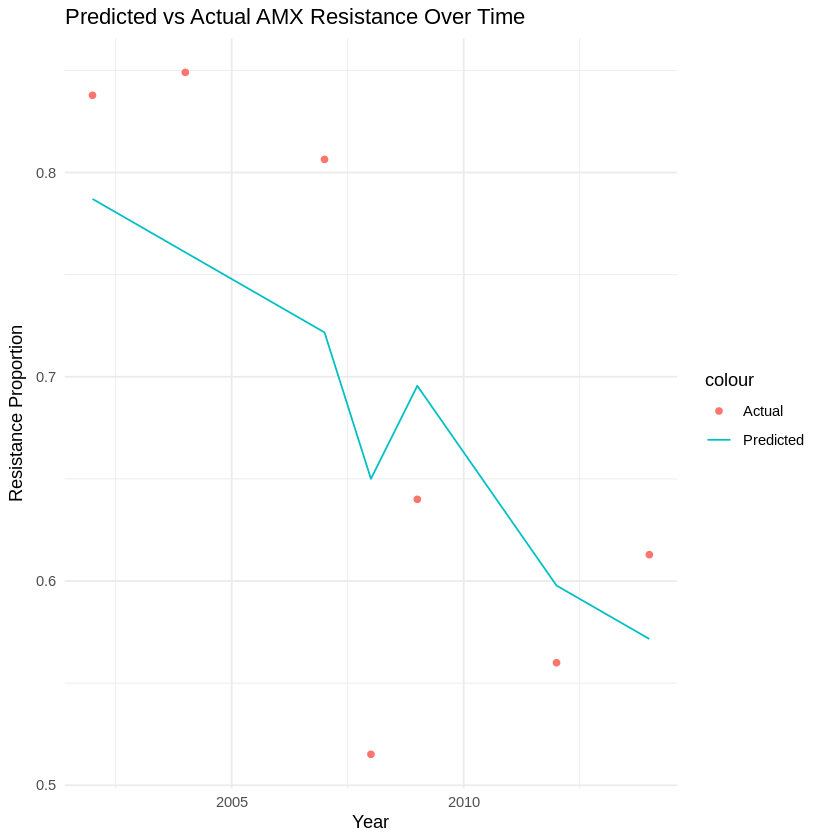

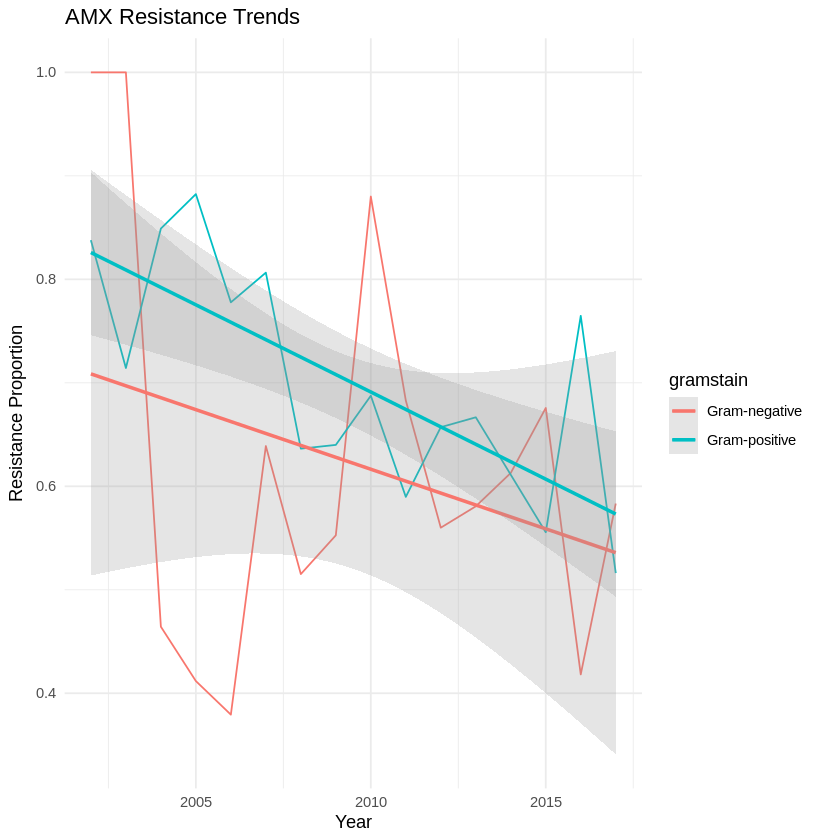

In [19]:
# Load required libraries
library(AMR)
library(tidymodels)
library(ggplot2) # For visualization

# Data Preparation for time series analysis
data_time <- example_isolates %>%
  top_n_microorganisms(n = 10) %>% # Filter on the top 10 species
  mutate(year = as.integer(format(date, "%Y")), # Extract year from date
         gramstain = mo_gramstain(mo)) %>% # Get taxonomic names
  group_by(year, gramstain) %>%
  summarise(across(c(AMX, AMC, CIP),
                   function(x) resistance(x, minimum = 0),
                  .names = "res_{.col}"),
           .groups = "drop") %>%
  filter(!is.na(res_AMX) &!is.na(res_AMC) &!is.na(res_CIP)) # Drop missing values
head(data_time)

# Define the recipe for preprocessing
resistance_recipe_time <- recipe(res_AMX ~ year + gramstain, data = data_time) %>%
  step_dummy(gramstain, one_hot = TRUE) %>% # Convert categorical to numerical
  step_normalize(year) %>% # Normalise year for better model performance
  step_nzv(all_predictors()) # Remove near-zero variance predictors

# Define the linear regression model
lm_model <- linear_reg() %>%
  set_engine("lm") # Use linear regression

# Create workflow combining recipe and model
resistance_workflow_time <- workflow() %>%
  add_recipe(resistance_recipe_time) %>%
  add_model(lm_model)

# Split the data into training and testing sets
set.seed(123) # For reproducibility of the split
data_split_time <- initial_split(data_time, prop = 0.8)
train_time <- training(data_split_time)
test_time <- testing(data_split_time)

# Train the model using the workflow
fitted_workflow_time <- resistance_workflow_time %>%
  fit(train_time)

# Make predictions on the test data
predictions_time <- fitted_workflow_time %>%
  predict(test_time) %>%
  bind_cols(test_time)

# Evaluate model performance
metrics_time <- predictions_time %>%
  metrics(truth = res_AMX, estimate =.pred)
print(metrics_time)

# Visualize actual vs. predicted resistance over time
ggplot(predictions_time, aes(x = year)) +
  geom_point(aes(y = res_AMX, color = "Actual")) +
  geom_line(aes(y =.pred, color = "Predicted")) +
  labs(title = "Predicted vs Actual AMX Resistance Over Time",
       x = "Year",
       y = "Resistance Proportion") +
  theme_minimal()

# Visualize resistance trends with linear models directly in ggplot2
ggplot(data_time, aes(x = year, y = res_AMX, color = gramstain)) +
  geom_line() +
  labs(title = "AMX Resistance Trends",
       x = "Year",
       y = "Resistance Proportion") +
  geom_smooth(method = "lm", formula = y ~ x, alpha = 0.25) + # Add linear model
  theme_minimal()

Rows: 2,000
Columns: 46
$ date    <date> 2002-01-02, 2002-01-03, 2002-01-07, 2002-01-07, 2002-01-13, 2…
$ patient <chr> "A77334", "A77334", "067927", "067927", "067927", "067927", "4…
$ age     <dbl> 65, 65, 45, 45, 45, 45, 78, 78, 45, 79, 67, 67, 71, 71, 75, 50…
$ gender  <chr> "F", "F", "F", "F", "F", "F", "M", "M", "F", "F", "M", "M", "M…
$ ward    <chr> "Clinical", "Clinical", "ICU", "ICU", "ICU", "ICU", "Clinical"…
$ mo      <mo> "B_ESCHR_COLI", "B_ESCHR_COLI", "B_STPHY_EPDR", "B_STPHY_EPDR",…
$ PEN     <sir> R, R, R, R, R, R, R, R, R, R, R, R, R, R, R, R, R, R, R, R, S,…
$ OXA     <sir> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ FLC     <sir> NA, NA, R, R, R, R, S, S, R, S, S, S, NA, NA, NA, NA, NA, R, R…
$ AMX     <sir> NA, NA, NA, NA, NA, NA, R, R, NA, NA, NA, NA, NA, NA, R, NA, N…
$ AMC     <sir> I, I, NA, NA, NA, NA, S, S, NA, NA, S, S, I, I, R, I, I, NA, N…
$ AMP     <sir> NA, NA, NA, NA, NA, NA, R, R, NA, NA, NA, NA, NA, NA, R, NA, N…
$ TZP     <sir> 

Warning message:
“There were 1473 warnings in `summarise()`.
The first warning was:
ℹ In argument: `PEN = (function (..., minimum = 30, as_percent = FALSE,
  only_all_tested = FALSE) ...`.
ℹ In group 1: `order = "(unknown order)"` `genus = "(unknown genus)"`.
Caused by warning:
! Introducing NA: only 15 results available for PEN in group: order =
"(unknown order)", genus = "(unknown genus)" (minimum = 30).
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1472 remaining warnings.”


order,genus,AMC,CXM,CTX,CAZ,GEN,TOB,TMP,SXT
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(unknown order),(unknown genus),NA,NA,NA,NA,NA,NA,NA,NA
Actinomycetales,Schaalia,NA,NA,NA,NA,NA,NA,NA,NA
Bacteroidales,Bacteroides,NA,NA,NA,NA,NA,NA,NA,NA
Campylobacterales,Campylobacter,NA,NA,NA,NA,NA,NA,NA,NA
Caryophanales,Gemella,NA,NA,NA,NA,NA,NA,NA,NA
Caryophanales,Listeria,NA,NA,NA,NA,NA,NA,NA,NA


ℹ Columns selected for PCA: "AMC", "CAZ", "CTX", "CXM", "GEN", "SXT",
  "TMP", and "TOB". Total observations available: 7.



Groups (n=4, named as 'order'):
[1] "Caryophanales"    "Enterobacterales" "Lactobacillales"  "Pseudomonadales" 



Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6       PC7
Standard deviation     2.1539 1.6807 0.6138 0.33879 0.20808 0.03140 1.232e-16
Proportion of Variance 0.5799 0.3531 0.0471 0.01435 0.00541 0.00012 0.000e+00
Cumulative Proportion  0.5799 0.9330 0.9801 0.99446 0.99988 1.00000 1.000e+00

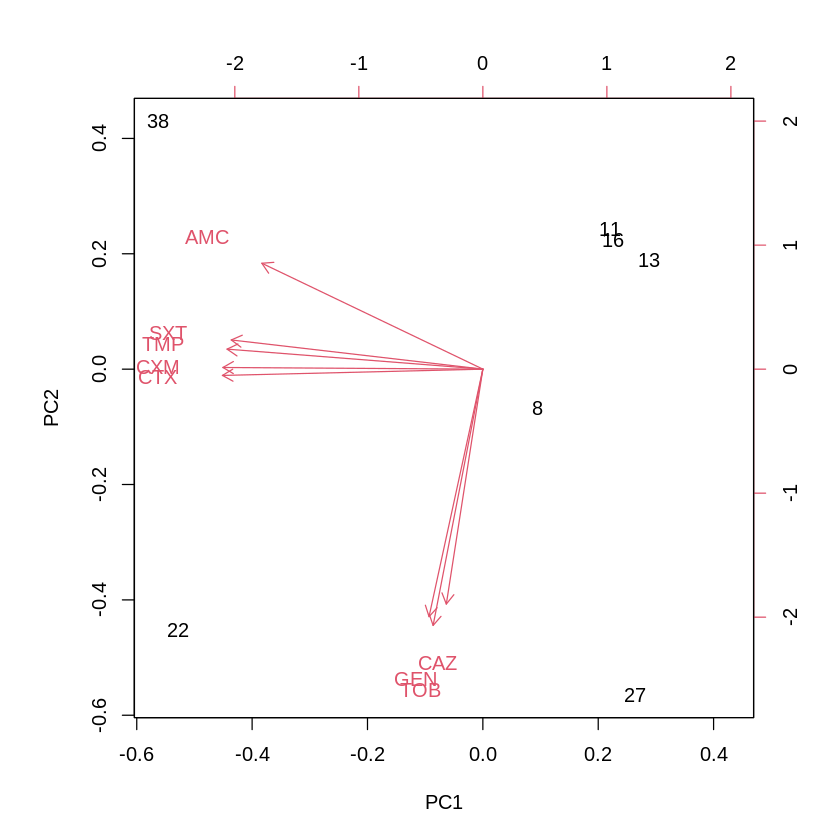

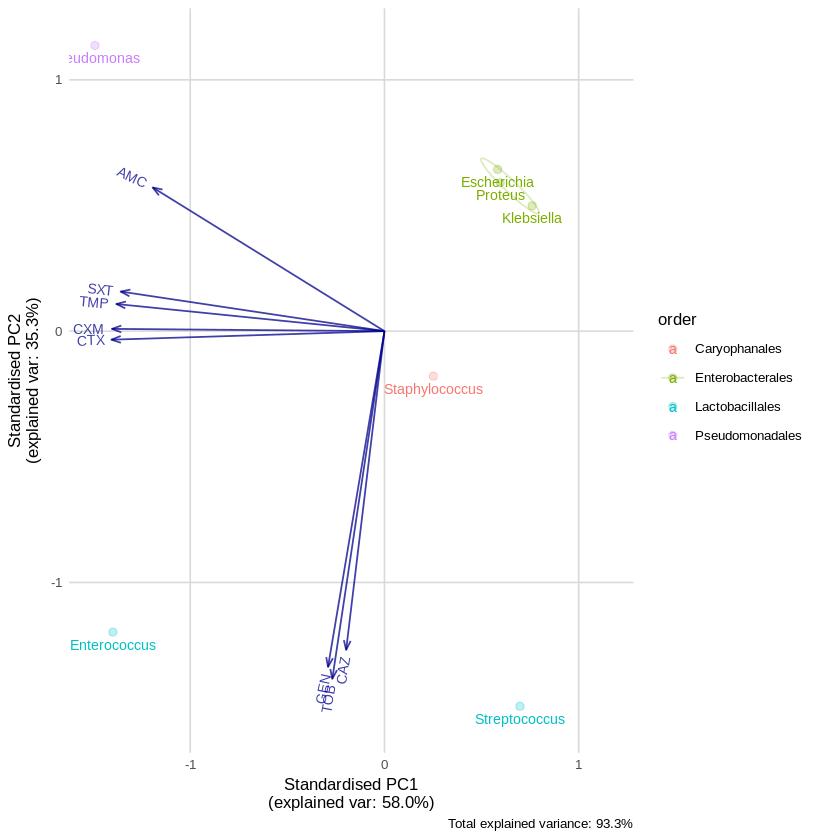

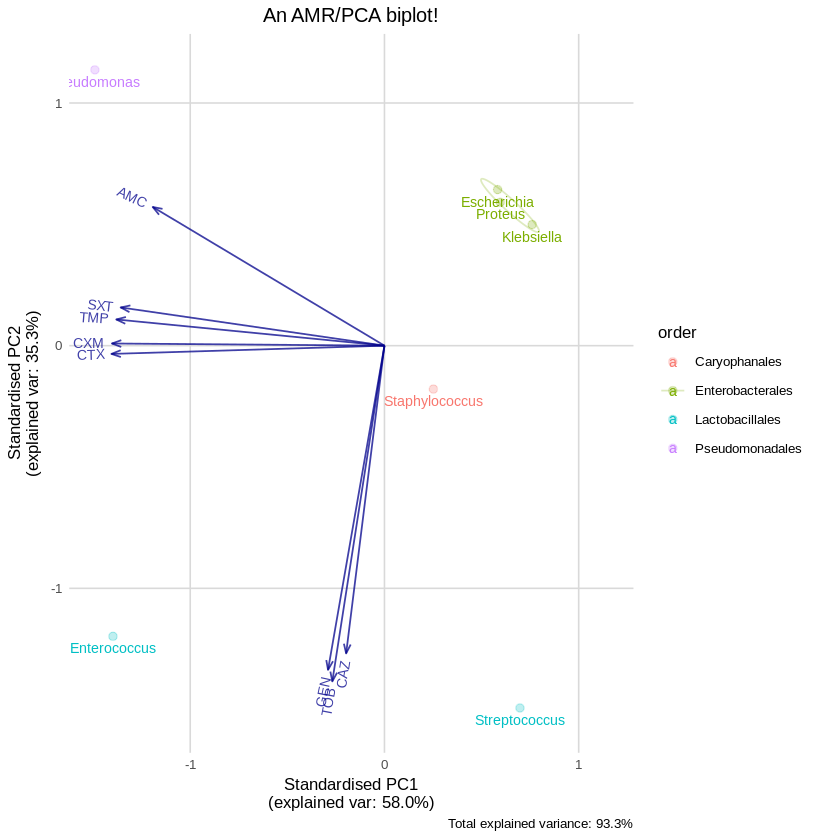

In [20]:
library(AMR)
library(dplyr)

# Glimpse of the example data (already cleaned 'example_isolates' is used here)
glimpse(example_isolates)

# Transform data for PCA: group by order and genus, then summarise resistance
resistance_data <- example_isolates %>%
  group_by(
    order = mo_order(mo), # group on anything, like order
    genus = mo_genus(mo) # and genus as we do here
  ) %>%
  summarise_if(is.sir, resistance) %>% # then get resistance of all drugs
  select(
    order, genus, AMC, CXM, CTX,
    CAZ, GEN, TOB, TMP, SXT
  ) # and select only relevant columns
head(resistance_data)

# Perform PCA
pca_result <- pca(resistance_data)

# Review PCA results summary
summary(pca_result)

# Plot PCA results using base R biplot
biplot(pca_result)

# Plot PCA results using ggplot_pca() from AMR package
ggplot_pca(pca_result)

# Plot with ellipses for groups and custom title
ggplot_pca(pca_result, ellipse = TRUE) +
  ggplot2::labs(title = "An AMR/PCA biplot!")

In [21]:
# Assuming 'combined_ab' is an antibiogram object generated by AMR's antibiogram() function
library(ggplot2)
library(AMR)
# Example antibiogram generation (conceptual, as specific antibiogram() output isn't detailed in snippets)
# combined_ab <- antibiogram(example_isolates_1st,...)
# autoplot(combined_ab)

Warning message:
“in as.mic(): 100 results in index '1' truncated (100%) that were invalid
MICs: "0.1749326", "10.7816097", "104.7069573", "105.9222217",
"106.1326438", "106.9263109", "11.6767805", "11.7470912", "111.3410184",
"112.6053146", "113.2115860", "114.8284557", "116.0617440", "116.9015230",
"119.2943978", "119.5034330", "121.6889132", "122.3236017", "130.9527252",
"135.2020834", "139.2877413", "141.1740922", "143.6092696", "146.6005614",
"152.1064451", "156.8751853", "161.0861714", "163.9751367", "167.1992963",
"167.8658490", "168.1352294", "170.2745131", "171.0272096", "173.4629191",
"176.8251907", "177.3622799", "181.3881719", "181.8110420", "192.8505136",
"193.1493235", "194.1692647", "200.2706067", "201.7813106", "201.8092901",
"203.3547191", "203.6427269", "204.5277766", "207.3793234", "207.9745286",
"208.5506304", "219.6060277", "226.0542102", "226.9377825", "227.7237218",
"228.4608891", "228.6226895", "229.1331863", "23.9739127", "230.3566950",
"230.9900211", "24.29278

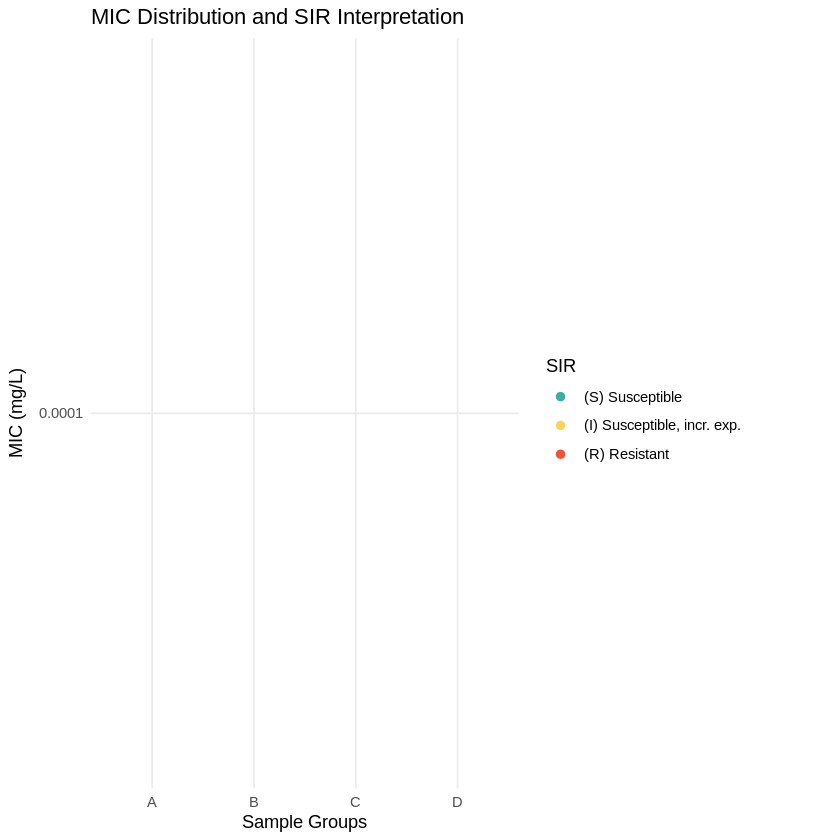

In [22]:
library(ggplot2)
library(AMR)

# Create dummy data for demonstration (replace with your actual MIC data)
# This example assumes 'my_data' has a 'MIC' column (numeric) and 'SIR' column (sir class)
set.seed(123)
my_data <- tibble(
  group = rep(c("A", "B", "C", "D"), each = 25),
  MIC = runif(100, min = 0.015, max = 256)
)
# Convert MIC to sir for plotting purposes (requires mo and ab for accurate interpretation)
# For a realistic plot, MIC values would be linked to specific mo/ab and interpreted.
# Here, we'll just assign some SIR values for demonstration of plotting.
my_data$SIR <- as.sir(sample(c("S", "I", "R"), 100, replace = TRUE))

ggplot(my_data, aes(x = group, y = MIC, colour = SIR)) +
  geom_jitter(width = 0.2, size = 2) + # Add points with jitter
  geom_boxplot(fill = NA, colour = "grey40") + # Add boxplots
  scale_y_mic() + # Apply MIC scale to y-axis
  scale_colour_sir() + # Apply SIR color scale
  labs(title = "MIC Distribution and SIR Interpretation",
       x = "Sample Groups",
       y = "MIC (mg/L)") +
  theme_minimal()

In [23]:
# Assuming 'mic_values' is a vector of MIC values
# autoplot(mic_values)

# autoplot(mic_values, mo = "K. pneumoniae", ab = "cipro", guideline = "EUCAST 2024")

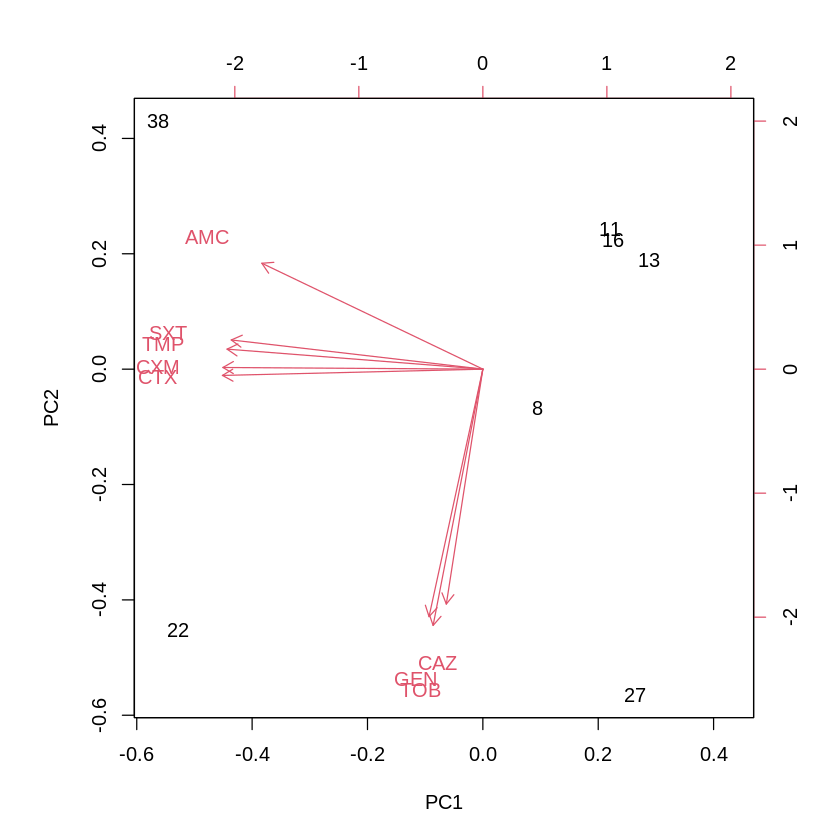

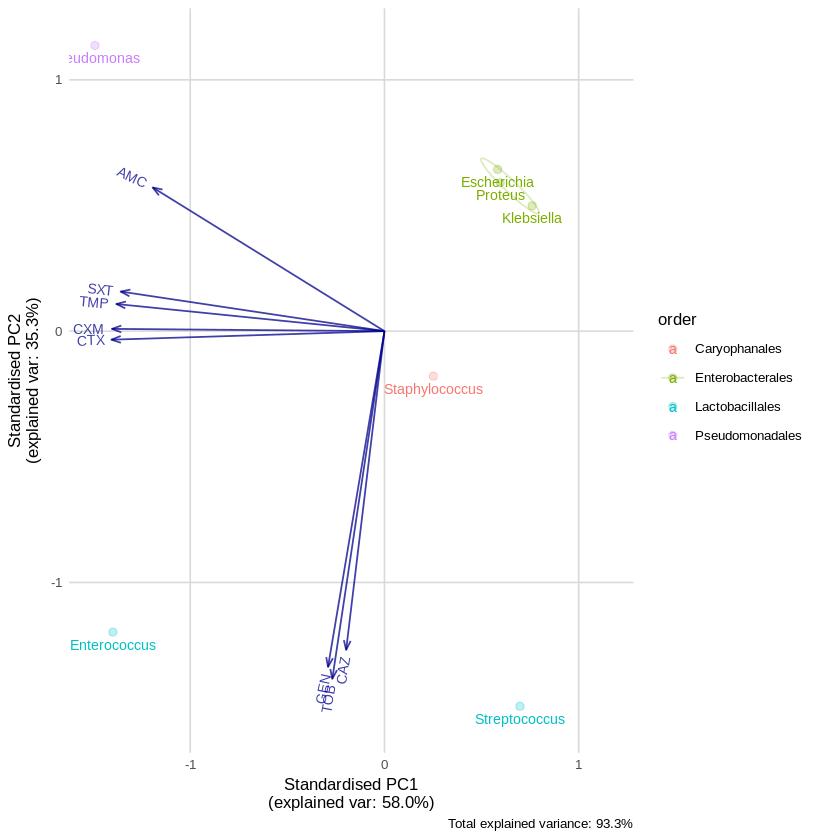

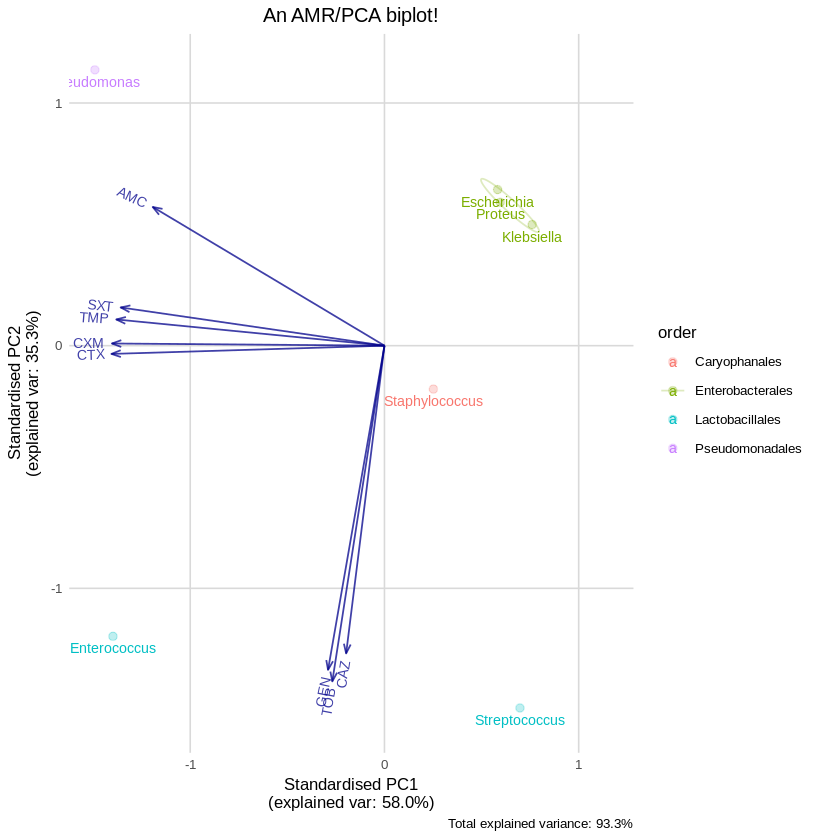

In [24]:
# Assuming 'pca_result' is the object obtained from pca() function (see Section 5.2)
library(ggplot2)
library(AMR)

# Plot using base R biplot()
biplot(pca_result)

# Plot using AMR's ggplot_pca()
ggplot_pca(pca_result)

# Plot with ellipses for groups and a custom title
ggplot_pca(pca_result, ellipse = TRUE) +
  ggplot2::labs(title = "An AMR/PCA biplot!")